In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [22]:
df = pd.read_csv('spotify_songs.csv')
df

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
...                       ...   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name  track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...    Ed Sheeran   
1                        Memories - Dillon Francis Remix      Maroon 5   
...                                                  ...           ...   
32831                     Only For You - Maor Levi Remix        Mat Zo   
32832                             Typhoon - Original Mix  Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
...                 ...                     ...   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
...                                                  ...   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
0                pop                  dance pop          0.75    0.92    6   
1                pop                  dance pop          0.73    0.81   11   
...              ...                        ...           ...     ...  ...   
32831            edm  progressive electro house          0.63    0.89    2   
32832            edm  progressive electro house          0.60    0.88    5   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -2.63     1         0.06      1.02e-01          0.00e+00      0.07   
1         -4.97     1         0.04      7.24e-02          4.21e-03      0.36   
...         ...   ...          ...           ...               ...       ...   
32831     -3.36     1         0.11      7.92e-03          1.27e-01      0.34   
32832     -4.57     0         0.04      1.33e-04          3.41e-01      0.74   

       valence   tempo  duration_ms  
0         0.52  122.04       194754  
1         0.69   99.97       162600  
...        ...     ...          ...  
32831     0.31  128.01       367432  
32832     0.09  127.98       337500  

[32833 rows x 23 columns]

In [27]:
df = df[df['playlist_genre'] == 'pop']

In [26]:
df[df['playlist_genre'] == 'pop']['playlist_subgenre'].value_counts()

indie poptimism    1672
electropop         1408
dance pop          1298
post-teen pop      1129
Name: playlist_subgenre, dtype: int64

# Transformation

In [28]:
df_trans = df.drop(['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'key', 'tempo', 'duration_ms','mode',], axis=1)
df_trans['genre'] = df['playlist_subgenre']
df_trans['genre'] = df_trans['genre'].replace({'indie poptimism': '0', 'electropop': '1', 'dance pop': '2', 'post-teen pop': '3'})
df_trans

danceability  energy  loudness  speechiness  acousticness  \
0             0.75    0.92     -2.63         0.06          0.10   
1             0.73    0.81     -4.97         0.04          0.07   
...            ...     ...       ...          ...           ...   
5505          0.67    0.39     -8.30         0.06          0.04   
5506          0.67    0.78     -5.88         0.04          0.06   

      instrumentalness  liveness  valence genre  
0             0.00e+00      0.07     0.52     2  
1             4.21e-03      0.36     0.69     2  
...                ...       ...      ...   ...  
5505          3.02e-04      0.11     0.63     0  
5506          1.17e-06      0.04     0.56     0  

[5507 rows x 9 columns]

In [36]:
df_trans['genre'].value_counts()

0    1672
1    1408
2    1298
3    1129
Name: genre, dtype: int64

# Analysis

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

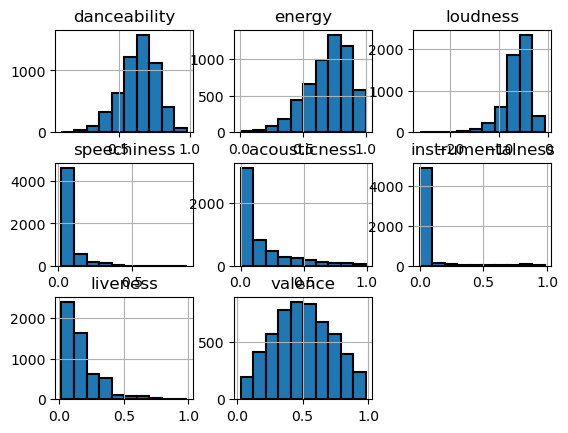

In [29]:
df_trans.hist(edgecolor='black', linewidth=1.5)

In [30]:
df_test = pd.concat([df_trans[df_trans['genre'] == '0'], df_trans[df_trans['genre'] == '1']])

In [31]:
sns.pairplot(data=df_test, hue="genre", height=2)

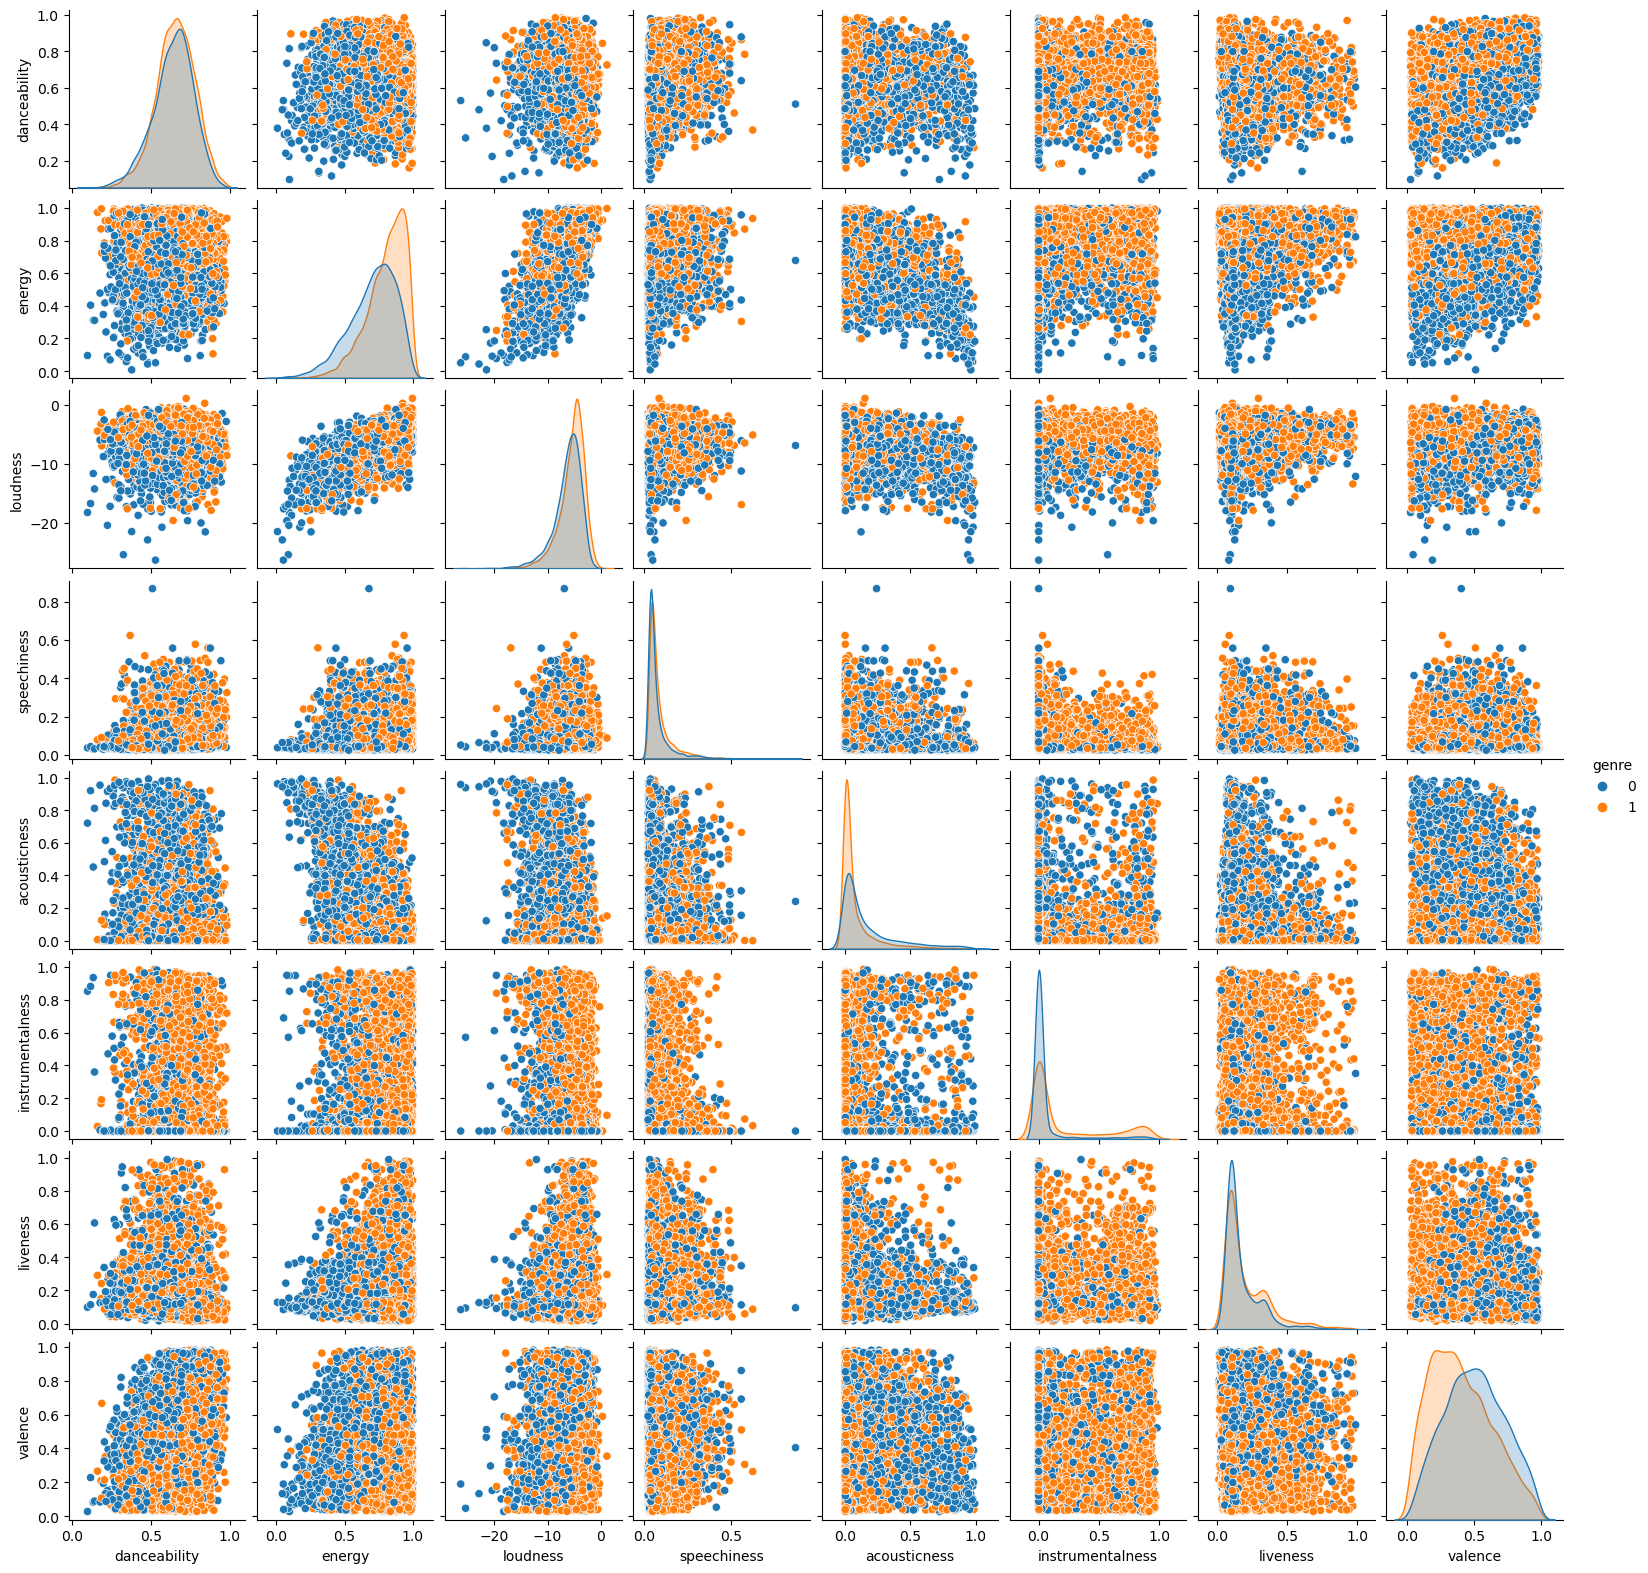

In [17]:
df_test = pd.concat([df_trans[df_trans['genre'] == '1'], df_trans[df_trans['genre'] == '0']])
df_test = df_test.sample(frac=1).reset_index(drop=True)
sns.pairplot(data=df_test, hue="genre", height=2)

# Save Files

In [32]:
concatenated_df = df_trans
concatenated_df = concatenated_df.sample(frac=1).reset_index(drop=True)
concatenated_df

danceability  energy  loudness  speechiness  acousticness  \
0             0.71    0.78     -5.45         0.30          0.04   
1             0.62    0.65     -7.51         0.03          0.02   
...            ...     ...       ...          ...           ...   
5505          0.51    0.62     -8.37         0.03          0.08   
5506          0.61    0.84     -5.11         0.03          0.01   

      instrumentalness  liveness  valence genre  
0             0.00e+00      0.18     0.51     0  
1             1.08e-03      0.11     0.28     0  
...                ...       ...      ...   ...  
5505          7.89e-04      0.21     0.19     1  
5506          1.31e-01      0.14     0.28     2  

[5507 rows x 9 columns]

In [33]:
train_num_rows = int(len(concatenated_df) * 0.8)
validation_num_rows = int(len(concatenated_df)*0.85)
print(train_num_rows)
print(validation_num_rows)

4405
4680


In [34]:
train_to_save = concatenated_df.iloc[:train_num_rows]
valid_to_save = concatenated_df.iloc[train_num_rows:validation_num_rows]
test_to_save = concatenated_df.iloc[validation_num_rows:]

In [35]:
train_to_save.to_csv('class_data/pop_train.csv', index=False)
test_to_save.to_csv('class_data/pop_test.csv', index=False)
valid_to_save.to_csv('class_data/pop_valid.csv', index=False)


# Each Class

In [ ]:
concatenated_df.to_csv('class_data/pop_0_edm_1.csv')

In [38]:
df_trans[df_trans['genre'] == '0'].to_csv('class_data/pop_0.csv', index=False)
df_trans[df_trans['genre'] == '1'].to_csv('class_data/edm_1.csv', index=False)
df_trans[df_trans['genre'] == '2'].to_csv('class_data/latin_2.csv', index=False)
df_trans[df_trans['genre'] == '3'].to_csv('class_data/r&b_3.csv', index=False)
df_trans[df_trans['genre'] == '4'].to_csv('class_data/rap_4.csv', index=False)
df_trans[df_trans['genre'] == '5'].to_csv('class_data/rock_5.csv', index=False)

In [39]:
concatenated_df = pd.concat([df_trans[df_trans['genre'] == '0'], df_trans[df_trans['genre'] == '1']])
concatenated_df

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726   0.815    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence genre  
0              0.000000    0.0653   0.5180     0  
1              0.004210    0.3570   0.6930     0  
2              0.000023    0.1100   0.6130     0  
3              0.000009    0.2040   0.2770     0  
4              0.000000    0.0833   0.7250     0  
...                 ...       ...      ...   ...  
32828          0.000000    0.0668   0.2100     1  
32829          0.004270    0.3750   0.4000     1  
32830          0.000001    0.1500   0.4360     1  
32831          0.127000    0.3430   0.3080     1  
32832          0.341000    0.7420   0.0894     1  

[11550 rows x 9 columns]